# Multiple Linear Regression

## Understanding The data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in canada.
[Data source]_(http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)




## Import Required Libraries

In [1]:
%pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

## Reading the data

In [3]:
df = pd.read_csv('vehicle_fuel_consumption.csv')
print(df.head(5))

   ModelYear   Make              Model                    Vehicle_Class  \
0       2024  Acura     Integra A-SPEC                        Full-size   
1       2024  Acura     Integra A-SPEC                        Full-size   
2       2024  Acura     Integra Type S                        Full-size   
3       2024  Acura         MDX SH-AWD     Sport utility vehicle: Small   
4       2024  Acura  MDX SH-AWD Type S  Sport utility vehicle: Standard   

   Engine_Size  Cylinders Transmission FuelType  Fuel_Consumption_City  \
0          1.5          4          AV7        Z                    8.1   
1          1.5          4           M6        Z                    8.9   
2          2.0          4           M6        Z                   11.1   
3          3.5          6         AS10        Z                   12.6   
4          3.0          6         AS10        Z                   13.8   

   Fuel_Consumption_Hwy  Fuel_Consumption_COMB  Fuel_Consumption_MPG  \
0                   6.5         

## Data Exploration

Let select some features that we want to use for regression

In [6]:
# Let's use some of the attributes with the highest correlation with CO2Emissions
corr_matrix = df.corr()
corr_emissions = df.corr()["CO2Emissions"].abs().sort_values(ascending=False)
top5_corr = corr_emissions[1:9]
print(top5_corr)

Fuel_Consumption_COMB    0.981656
Fuel_Consumption_City    0.972138
CO2_Rating               0.965463
Fuel_Consumption_Hwy     0.942329
Fuel_Consumption_MPG     0.928229
Cylinders                0.791205
Engine_Size              0.785690
Smog_Rating              0.537486
Name: CO2Emissions, dtype: float64


In [10]:
cdf = df[['Fuel_Consumption_COMB','Fuel_Consumption_City','Fuel_Consumption_Hwy','Cylinders','Engine_Size','CO2Emissions']]
cdf.head(10)

,Fuel_Consumption_COMB,Fuel_Consumption_City,Fuel_Consumption_Hwy,Cylinders,Engine_Size,CO2Emissions
0,7.4,8.1,6.5,4,1.5,172
1,7.8,8.9,6.5,4,1.5,181
2,9.9,11.1,8.3,4,2.0,230
3,11.2,12.6,9.4,6,3.5,263
4,12.4,13.8,11.2,6,3.0,291
5,9.9,11.0,8.6,4,2.0,232
6,10.3,11.3,9.1,4,2.0,241
7,8.7,10.0,7.2,4,2.0,205
8,9.2,10.5,7.7,4,2.0,217
9,11.6,13.5,9.3,6,2.9,271


In [9]:
# Plotting the target variable Emissions with some of the above features

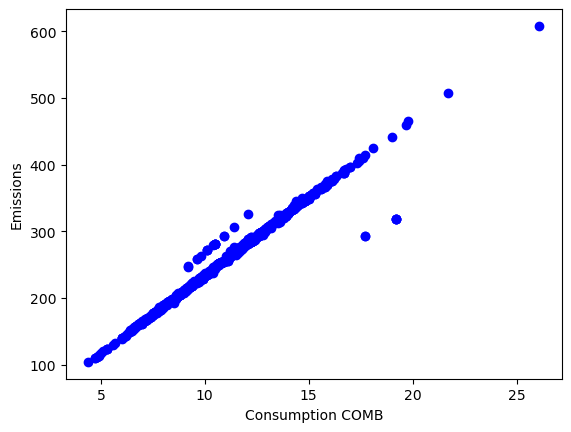

In [11]:
plt.scatter(cdf.Fuel_Consumption_COMB, cdf.CO2Emissions, color='blue')
plt.xlabel('Consumption COMB')
plt.ylabel('Emissions')
plt.show()

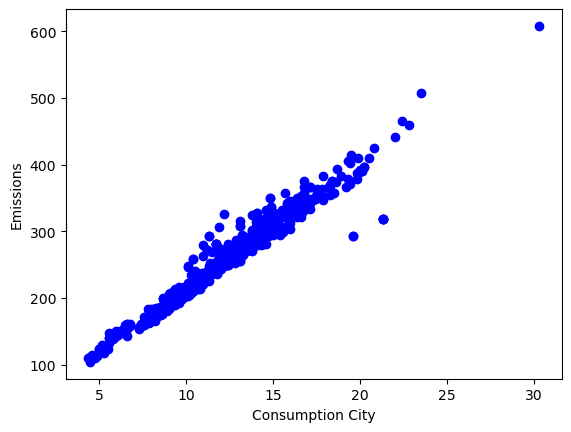

In [12]:
plt.scatter(cdf.Fuel_Consumption_City, cdf.CO2Emissions, color='blue')
plt.xlabel('Consumption City')
plt.ylabel('Emissions')
plt.show()

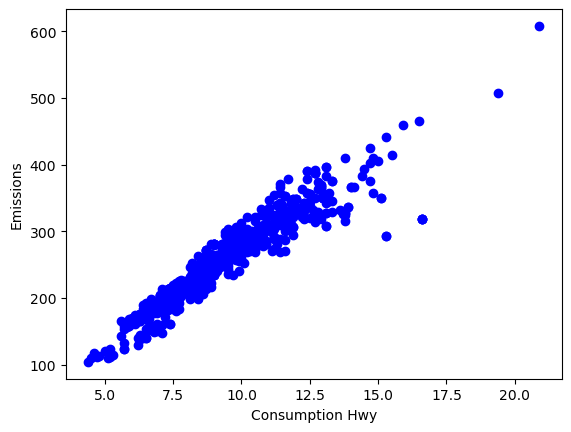

In [13]:
plt.scatter(cdf.Fuel_Consumption_Hwy, cdf.CO2Emissions, color='blue')
plt.xlabel('Consumption Hwy')
plt.ylabel('Emissions')
plt.show()

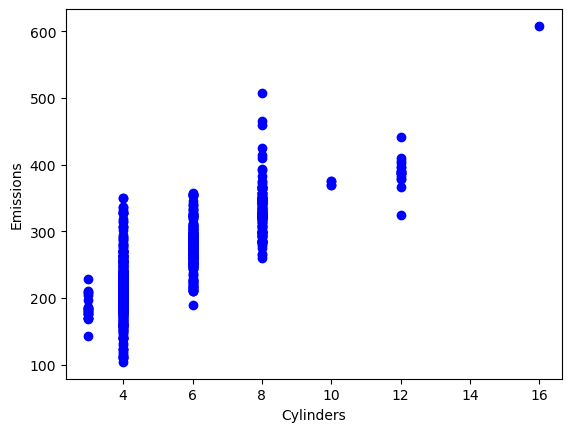

In [14]:
plt.scatter(cdf.Cylinders, cdf.CO2Emissions, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.show()

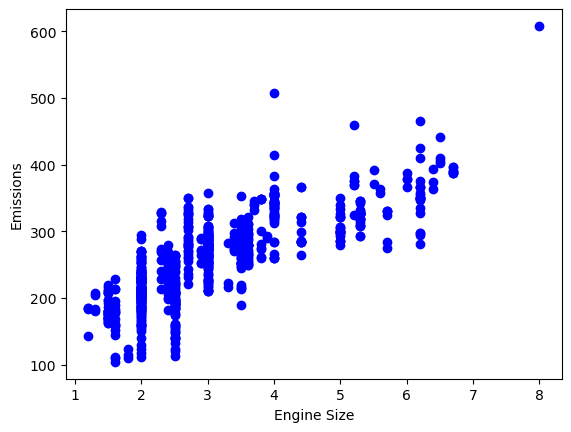

In [15]:
plt.scatter(cdf.Engine_Size, cdf.CO2Emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Creating the training and testing dataset

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Train data distribution

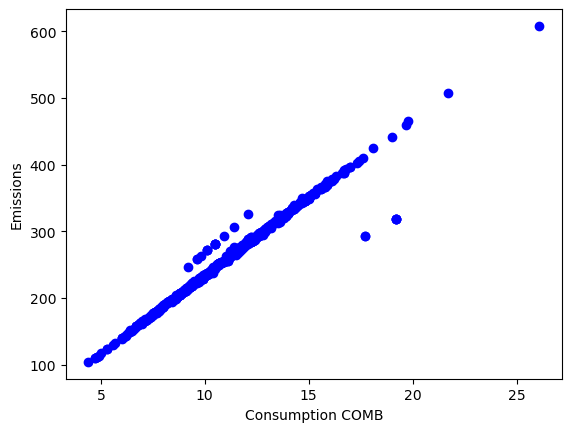

In [19]:
plt.scatter(train.Fuel_Consumption_COMB, train.CO2Emissions, color='blue')
plt.xlabel('Consumption COMB')
plt.ylabel('Emissions')
plt.show()



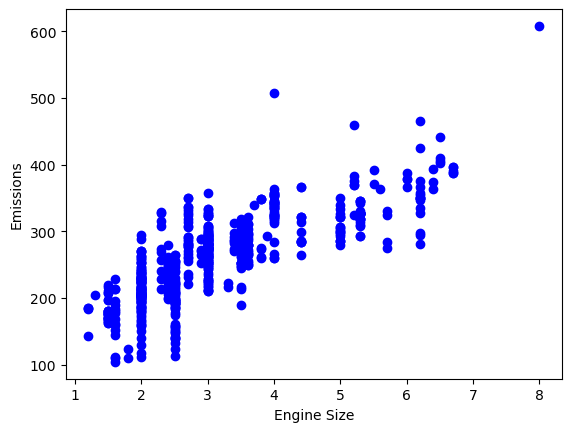

In [20]:
plt.scatter(train.Engine_Size, train.CO2Emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

## Multiple Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

regr = LinearRegression()
x = np.asanyarray(train[['Fuel_Consumption_COMB','Fuel_Consumption_City','Fuel_Consumption_Hwy','Cylinders','Engine_Size']])
y = np.asanyarray(train[['CO2Emissions']])
regr.fit(x,y)
# print the coefficient
print("Coefficients:", regr.coef_)

Coefficients: [[ 3.23034132 10.12599993  8.07653446  3.05261851 -2.53374041]]


In [22]:
x1 = np.asanyarray(test[['Fuel_Consumption_COMB','Fuel_Consumption_City','Fuel_Consumption_Hwy','Cylinders','Engine_Size']])
y1 = np.asanyarray(test[['CO2Emissions']])
y_hat = regr.predict(x1)

print("Mean Squared Error(MSE): %.2f" % np.mean((y_hat - y1)**2))
# Explained Variance Score: 1 is perfect prediction
print("Variance Score: %.2f" % regr.score(x1,y1))

Mean Squared Error(MSE): 42.61
Variance Score: 0.99


In [23]:
# The model has shown very high accuracy with a very low mean squared error and a very high variance score

In [24]:
df.to_csv("vehicle_fuel_consumption.csv", index=False)